In [ ]:
#install aimodelshare library
! pip install aimodelshare --upgrade

In [ ]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [ ]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [ ]:
y_train

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
83,1,0,0,0,0
84,0,0,1,0,0
85,0,0,0,1,0
86,1,0,0,0,0


## Reverse one hot encoding the y_train data

In [ ]:
y_train['happiness']=y_train.idxmax(1)

In [ ]:
happy=y_train['happiness']

In [ ]:
y_train

,Average,High,Low,Very High,Very Low,happiness
0,1,0,0,0,0,Average
1,0,1,0,0,0,High
2,1,0,0,0,0,Average
3,0,0,0,1,0,Very High
4,0,1,0,0,0,High
...,...,...,...,...,...,...
83,1,0,0,0,0,Average
84,0,0,1,0,0,Low
85,0,0,0,1,0,Very High
86,1,0,0,0,0,Average


In [ ]:
#Arranging happiness values according to levels
def happy_to_numbers(happy):
 if happy=='Very Low':
  return 1
 elif happy=='Low':
  return 2
 elif happy=='Average':
  return 3
 elif happy=='High':
  return 4
 elif happy=='Very High':
  return 5

In [ ]:
happy['happy_numbers']=happy.apply(happy_to_numbers) 

<ipython-input-249-6e4352c744dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy['happy_numbers']=happy.apply(happy_to_numbers)


In [ ]:
happiness_level=y_train['happiness'].apply(happy_to_numbers)

In [ ]:
happiness_level

0     3
1     4
2     3
3     5
4     4
     ..
83    3
84    2
85    5
86    3
87    2
Name: happiness, Length: 88, dtype: int64

In [ ]:
data=happy['happy_numbers']
data

0     3
1     4
2     3
3     5
4     4
     ..
83    3
84    2
85    5
86    3
87    2
Name: happiness, Length: 88, dtype: int64

In [ ]:
y_train=y_train.drop(columns=['happiness'])

## Visualizing the relationship between happiness and social support

Text(0, 0.5, 'happiness_level')

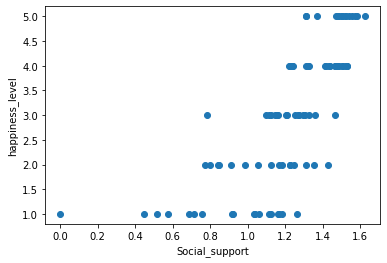

In [ ]:
        import matplotlib.pyplot as plt
        plt.scatter(X_train['Social support'],data) 
        plt.xlabel("Social_support")
        plt.ylabel("happiness_level")

According to the above visualization, we can see that social support and happiness levels are positively correlated. We can see that with an increase in social support, happiness levels move from 1-5

## Visualizing the relationship between happiness and GDP per Capita

Text(0, 0.5, 'happiness_level')

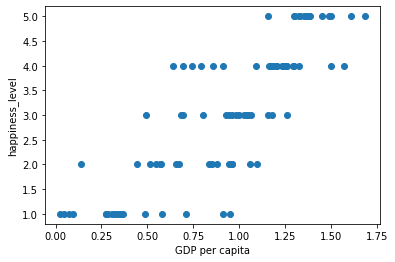

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['GDP per capita'],data)
plt.xlabel("GDP per capita")
plt.ylabel("happiness_level")

According to the above visualization, we can see that GDP per capita and happiness levels are positively correlated. We can see that with an increase in GDP per capita, happiness levels move from 1-5

## Visualizing the relationship between happiness and Generosity

Text(0, 0.5, 'happiness_level')

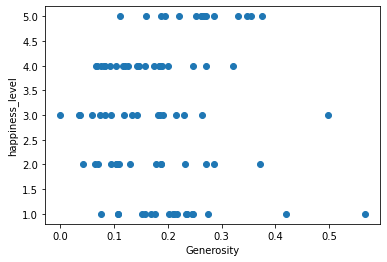

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['Generosity'],data)
plt.xlabel("Generosity")
plt.ylabel("happiness_level")

According to the above visualization, we can see that Generosity and happiness levels are not very correlated. We can see that an increase in generosity almsot equally makes people happy or less happy/(unhappy). 

## Visualizing the relationship between happiness and Freedom to make life choices

Text(0, 0.5, 'happiness_level')

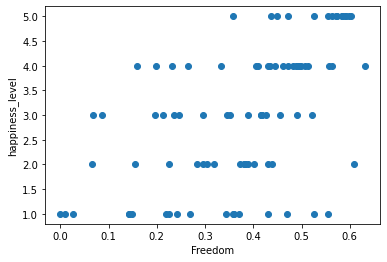

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['Freedom to make life choices'],data)
plt.xlabel("Freedom")
plt.ylabel("happiness_level")

According to the above visualization, we can see that Freedom to make life choices and happiness levels are positively correlated. We can see that with an increase in Freedom, happiness levels move from 1-5. This shift is gradual.

###2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

## 2) Feature Importance

In [ ]:
y_train=y_train.drop(columns=['happiness'])

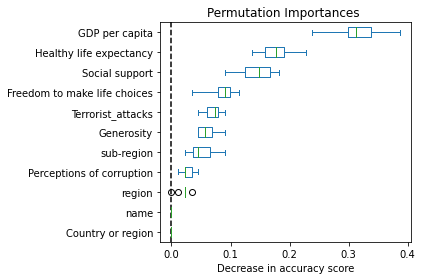

In [ ]:
from sklearn.inspection import permutation_importance

rf = Pipeline([
    ('preprocess', preprocess),
    # put your model below
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances ")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

According the the above model, we can see that GDP per capita is an important relevant predictor of happiness followed by healthy life expectancy. Logicaly speaking, they add up. One of the bare minimums for being happy is having enough resources to live well which is ensured by a high GDP per capita. A healthy life expectancy and social support naturally make one happier. 

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

## Random Forest Classifier with n estimators as 300 , max depth as 3. (Version 840)
 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=3)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8522727272727273

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 840

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


The above model was the first model tried prior to discussion. 300 is the number of n estimators and max depth is 3. 

## Random Forest Classifier with n estimators as 400 , max depth as 3. (Version 471 and 842).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=400, max_depth=3)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8409090909090909

#### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1: (Version 471)

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 842

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Using Random Forest Classifier with n estimators as 100 and max depth as 5. (Version 473 and 843))

In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=100, max_depth=5)
model_2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model_2.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9545454545454546

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2: 

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 prediction_submission=prediction_labels,
                                 preprocessor_filepath="preprocessor.zip",
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 843

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Using Random Forest Classifier with n estimators as 100 and max depth as 6. (Version 473 and 844)

In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=100, max_depth=6)
model_2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model_2.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9886363636363636

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2: 

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 prediction_submission=prediction_labels,
                                 preprocessor_filepath="preprocessor.zip")

Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 844

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Compare two or more models
data=mycompetition.compare_models([2,3], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_2,model_version_3
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,3,5
5,max_features,auto,auto,auto
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_impurity_split,None,None,None


## Using grid search cv to determine best parameters and then submitting models with those parameters.(100,300,500)(Version 792 and 846) 

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 300, 500),'max_depth':[1, 3, 5]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.682
best parameters: {'max_depth': 5, 'n_estimators': 100}


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3: 

#-- Generate predicted values
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 846

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Using Random Forest Classifier with n estimators as 100 , max depth as 5. (Version 794 and 849)

In [ ]:
model = RandomForestClassifier(n_estimators=100,
    max_depth=5).fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

0.9545454545454546

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3: 

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 849

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Using grid search cv to determine best parameters for Random Forest and then submitting models with those parameters.(300,500,700)

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(300, 500, 700),'max_depth':[7, 9, 11]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.692
best parameters: {'max_depth': 7, 'n_estimators': 300}


## Using Random Forest Classifier with n estimators as 300 , max depth as 7. (Version 766 and 850)



In [ ]:
model = RandomForestClassifier(n_estimators=300,
    max_depth=7).fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

1.0

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3: 

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 850

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Comparing models and leaderboard

In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([3,4], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_3,model_version_4
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,5,5
5,max_features,auto,auto,auto
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_impurity_split,None,None,None


## Using grid search cv to determine best parameters with GBC and then submitting models with those parameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': np.arange(300, 500, 700),'max_depth':[7, 9, 11]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)


gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.567
best parameters: {'max_depth': 7, 'n_estimators': 300}


## Using Gradient Boosting Classifier with n estimators as 300 , max depth as 7. (Version 775 and 852)

In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,
    max_depth=7, random_state=0).fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

1.0

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model.predict(preprocessor(X_test))
# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 852

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Sequential (Version 837)

In [ ]:
# Or you can experiment with deep learning models: 
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

In [ ]:
# Save keras model to ONNX file 

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata={"team":"1"})

3/3 [==============================] - 0s 3ms/step
Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 837

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
submit_model(......, custom_metadata={"team":"1"})

## Sequential(Version 838)

In [ ]:
# Or you can experiment with deep learning models: 
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

In [ ]:
# Save keras model to ONNX file 

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata={"team":"1"})

3/3 [==============================] - 0s 4ms/step
Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 838

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Using Gradient Boosting Classifier with n estimators as 500 , max depth as 11. (Version 485) 

In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,
    max_depth=11, random_state=0).fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

1.0

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model.predict(preprocessor(X_test))
# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)


Insert search tags to help users find your model (optional): .
Provide any useful notes about your model (optional): .

Your model has been submitted as model version 485

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Check leaderboard 

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

# The best models out of the many I have tried here before and after discussion with my team are the Model using Random Forest Classifier using n_estimators as 300 and max_depth as 7, the Gradient Boosting Classifier using n_estimators as 300 and max_depth as 7 and the Sequential Model with 128,64,64,32,5 neurons. I tried using different values of n_estimators and max_depths(3,5,6,7) in the Random Forest and Gradient Boosting Models (100,300,400) and experimented with a sequential model with more hidden layers. The Random Forest Model with n estimators as 100 and max depth as 5 also performed well. Gridsearch was used to determine the best parameters. My best model has an accuracy score of 52.94%, an f1 score of 51.25 %, precision of 65.11% and recall 55.29%. It is a Random Forest Classifier with n estimators as 300 and max_depth as 7.

## Link to Github: https://github.com/arushisaranath/World-Happiness-Report/blob/main/World_Happiness_Report.ipynb